In [381]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [382]:
# read Excel file
df = pd.read_excel('stopwords.xlsx')

# extract words from cells and convert to list
words = df.values.flatten().tolist()

words = [x for x in words if str(x) != 'nan']

#print(words)

new_words = []

for word in words:
    if "'" in word:
        new_word = word.replace("'", "")
        new_words.append(new_word)
    else:
        new_words.append(word)

# print the list of words
print(len(words))
print(len(new_words))

664
664


In [383]:
stopwords_df = pd.DataFrame({"stopwords":new_words})
stopwords_df.to_csv('stopwords.csv', index=False)

In [399]:
stopwords_df = pd.read_csv('Datasets/scraped/stopwords.csv')
script_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')
characters_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
script_df['character_id'] = script_df['character_id'].fillna(0).astype(int)

C:\Users\nikol\AppData\Local\Temp\ipykernel_16032\1098175798.py:2: DtypeWarning: Columns (4,5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  script_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')


In [400]:
names_list = characters_df['normalized_name'].tolist()
sep_names_list = []
for name in names_list:
    if ' ' in name:
        sep_names_list += name.split(' ')
    else:
        sep_names_list.append(name)
stopwords_df = pd.concat([stopwords_df, pd.DataFrame({'stopwords':sep_names_list})], ignore_index=True)

In [386]:
stopwords_df

,stopwords
0,able
1,kept
2,take
3,about
4,kg
...,...
13551,goodman
13552,evan
13553,conover
13554,agent


In [387]:
script_df.iloc[153016]

id                                                                 4263
episode_id                                                           14
number                                                              255
raw_text              Entire Town: "GONE AWAY IS THE BLUEBIRD / HERE...
timestamp_in_ms                                                 1141000
speaking_line                                                      TRUE
character_id                                                        241
location_id                                                       211.0
raw_character_text                                          Entire Town
raw_location_text                                          NEIGHBORHOOD
spoken_words          GONE AWAY IS THE BLUEBIRD / HERE TO STAY...,go...
normalized_text        WITH HEART) ""Chapter Six: Four Days in Phila...
word_count                                                    1154000.0
Unnamed: 13                                                     

In [388]:
script_df.loc[script_df['character_id']==1]['normalized_text']

60                                    lisa tell your father
74        homer you are not allowed to have hurt feeling...
84                                     that was our wedding
86                   children its time for you to go to bed
109                 homie did you straighten everything out
                                ...                        
158253                                                  yes
158255                                                   no
158257                                                  yes
158259                                                   no
158261                                                  yes
Name: normalized_text, Length: 14265, dtype: object

In [389]:
character_lines = []
for i in range(6000):
    spaced_lines = script_df.loc[script_df['character_id']==(i+1)]['normalized_text']+' '
    sep_lines = spaced_lines.tolist()
    sep_lines = [x for x in sep_lines if str(x) != 'nan']
    total_lines = ''.join(sep_lines)
    character_lines.append(total_lines)

In [390]:
character_lines[0]

'lisa tell your father homer you are not allowed to have hurt feelings right now theres a little girl upstairs who needs you her confidence in her father is shaken and no little girl can be happy unless she has faith in her daddy that was our wedding children its time for you to go to bed homie did you straighten everything out homer you promised homer please weve never thrown a party now were gonna pay back all the friends whove invited us to their homes oh theyre here how does everything look do we have enough glasses homer homer put a record on children go now homer go easy on the al-ky-hol remember last year at the winfields party when you threw up in the laundry hamper i must apologize for my husband hmmm thank you i will dr hibbert thanks for coming i have never been so embarrassed in my life come here shhh i want to make sure the kids dont hear when i was young i always hated knowing my parents were fighting homer do you remember the way you acted at the party last night homer i

In [401]:
vectorizer = TfidfVectorizer(stop_words=stopwords_df['stopwords'].tolist(),
                             lowercase=True, max_df=0.005, norm='l2', smooth_idf=True)
tf_idf_matrix = vectorizer.fit_transform(character_lines)
feature_names = vectorizer.get_feature_names_out()

D:\Documents\Programming\datamadness\venv\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['11', '13', '16', '20', '24', '32', '3po', '40', '52s', '60', '80', '800', 'abdul', 'alikes', 'altered', 'amer', 'anti', 'apocalyptic', 'armed', 'ass', 'auto', 'autograph', 'bare', 'beaver', 'bitten', 'bohemian', 'bot', 'bottle', 'bound', 'brew', 'busted', 'cart', 'chapin', 'check', 'chested', 'chilled', 'clam', 'clams', 'clean', 'clone', 'conrad', 'crest', 'day', 'deranged', 'dia', 'ding', 'dong', 'drive', 'dubbed', 'electronically', 'elegantly', 'er', 'ers', 'espn', 'esque', 'euro', 'european', 'eyed', 'fast', 'faucet', 'fedex', 'fielder', 'foot', 'ghibli', 'glue', 'goer', 'golly', 'good', 'goony', 'grade', 'green', 'grumpy', 'guilden', 'hag', 'haired', 'hairy', 'handed', 'hard', 'hating', 'headed', 'holo', 'hop', 'ish', 'jabbar', 'jail', 'jam', 'jocks', 'jub', 'kicked'

In [392]:
def top_k_words(id):
    feature_scores = tf_idf_matrix[id].toarray().tolist()[0]
    feature_dict = dict(zip(feature_names, feature_scores))
    top_k_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:10]

    top_k_keywords = [feature[0] for feature in top_k_features]
    print(characters_df.loc[characters_df['id']==id+1]['name'])
    print(top_k_keywords)

top_k_words(7)

71    Bart Simpson
Name: name, dtype: object
['lis', 'carumba', 'ay', 'awesome', 'lame', 'sucks', 'nyah', 'homework', 'aye', 'prank']


In [456]:
dummy = []
for i in range(6000):
    dummy.append(i)
dummy[1434]

1434

In [474]:
def find_character(partial_name):
    for char_id in range(6000):
        if char_id+1 in characters_df['id'].tolist():
            n = characters_df.loc[characters_df['id']==char_id+1]['name'].iloc[0]
            if partial_name in n.lower():
                return char_id, n.lower()

In [477]:
find_character('comic book')

(800, 'comic book guy')

In [486]:
selected_characters = [0, 1, 7, 8, 14, 2, 17, 10, 1434, 800]
def plot_top_words():
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for idx, char_id in enumerate(selected_characters):
        feature_scores = tf_idf_matrix[char_id].toarray().tolist()[0]
        feature_dict = dict(zip(feature_names, feature_scores))
        top_k_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        top_k_keywords = [feature[0] for feature in top_k_features]
        weights = [feature[1] for feature in top_k_features]

        character_name = characters_df.loc[characters_df['id']==char_id+1]['name'].iloc[0]

        ax = axes[idx]
        ax.barh(top_k_keywords, weights, height=0.7)
        ax.set_title(f"{character_name}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('Most frequent words', fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

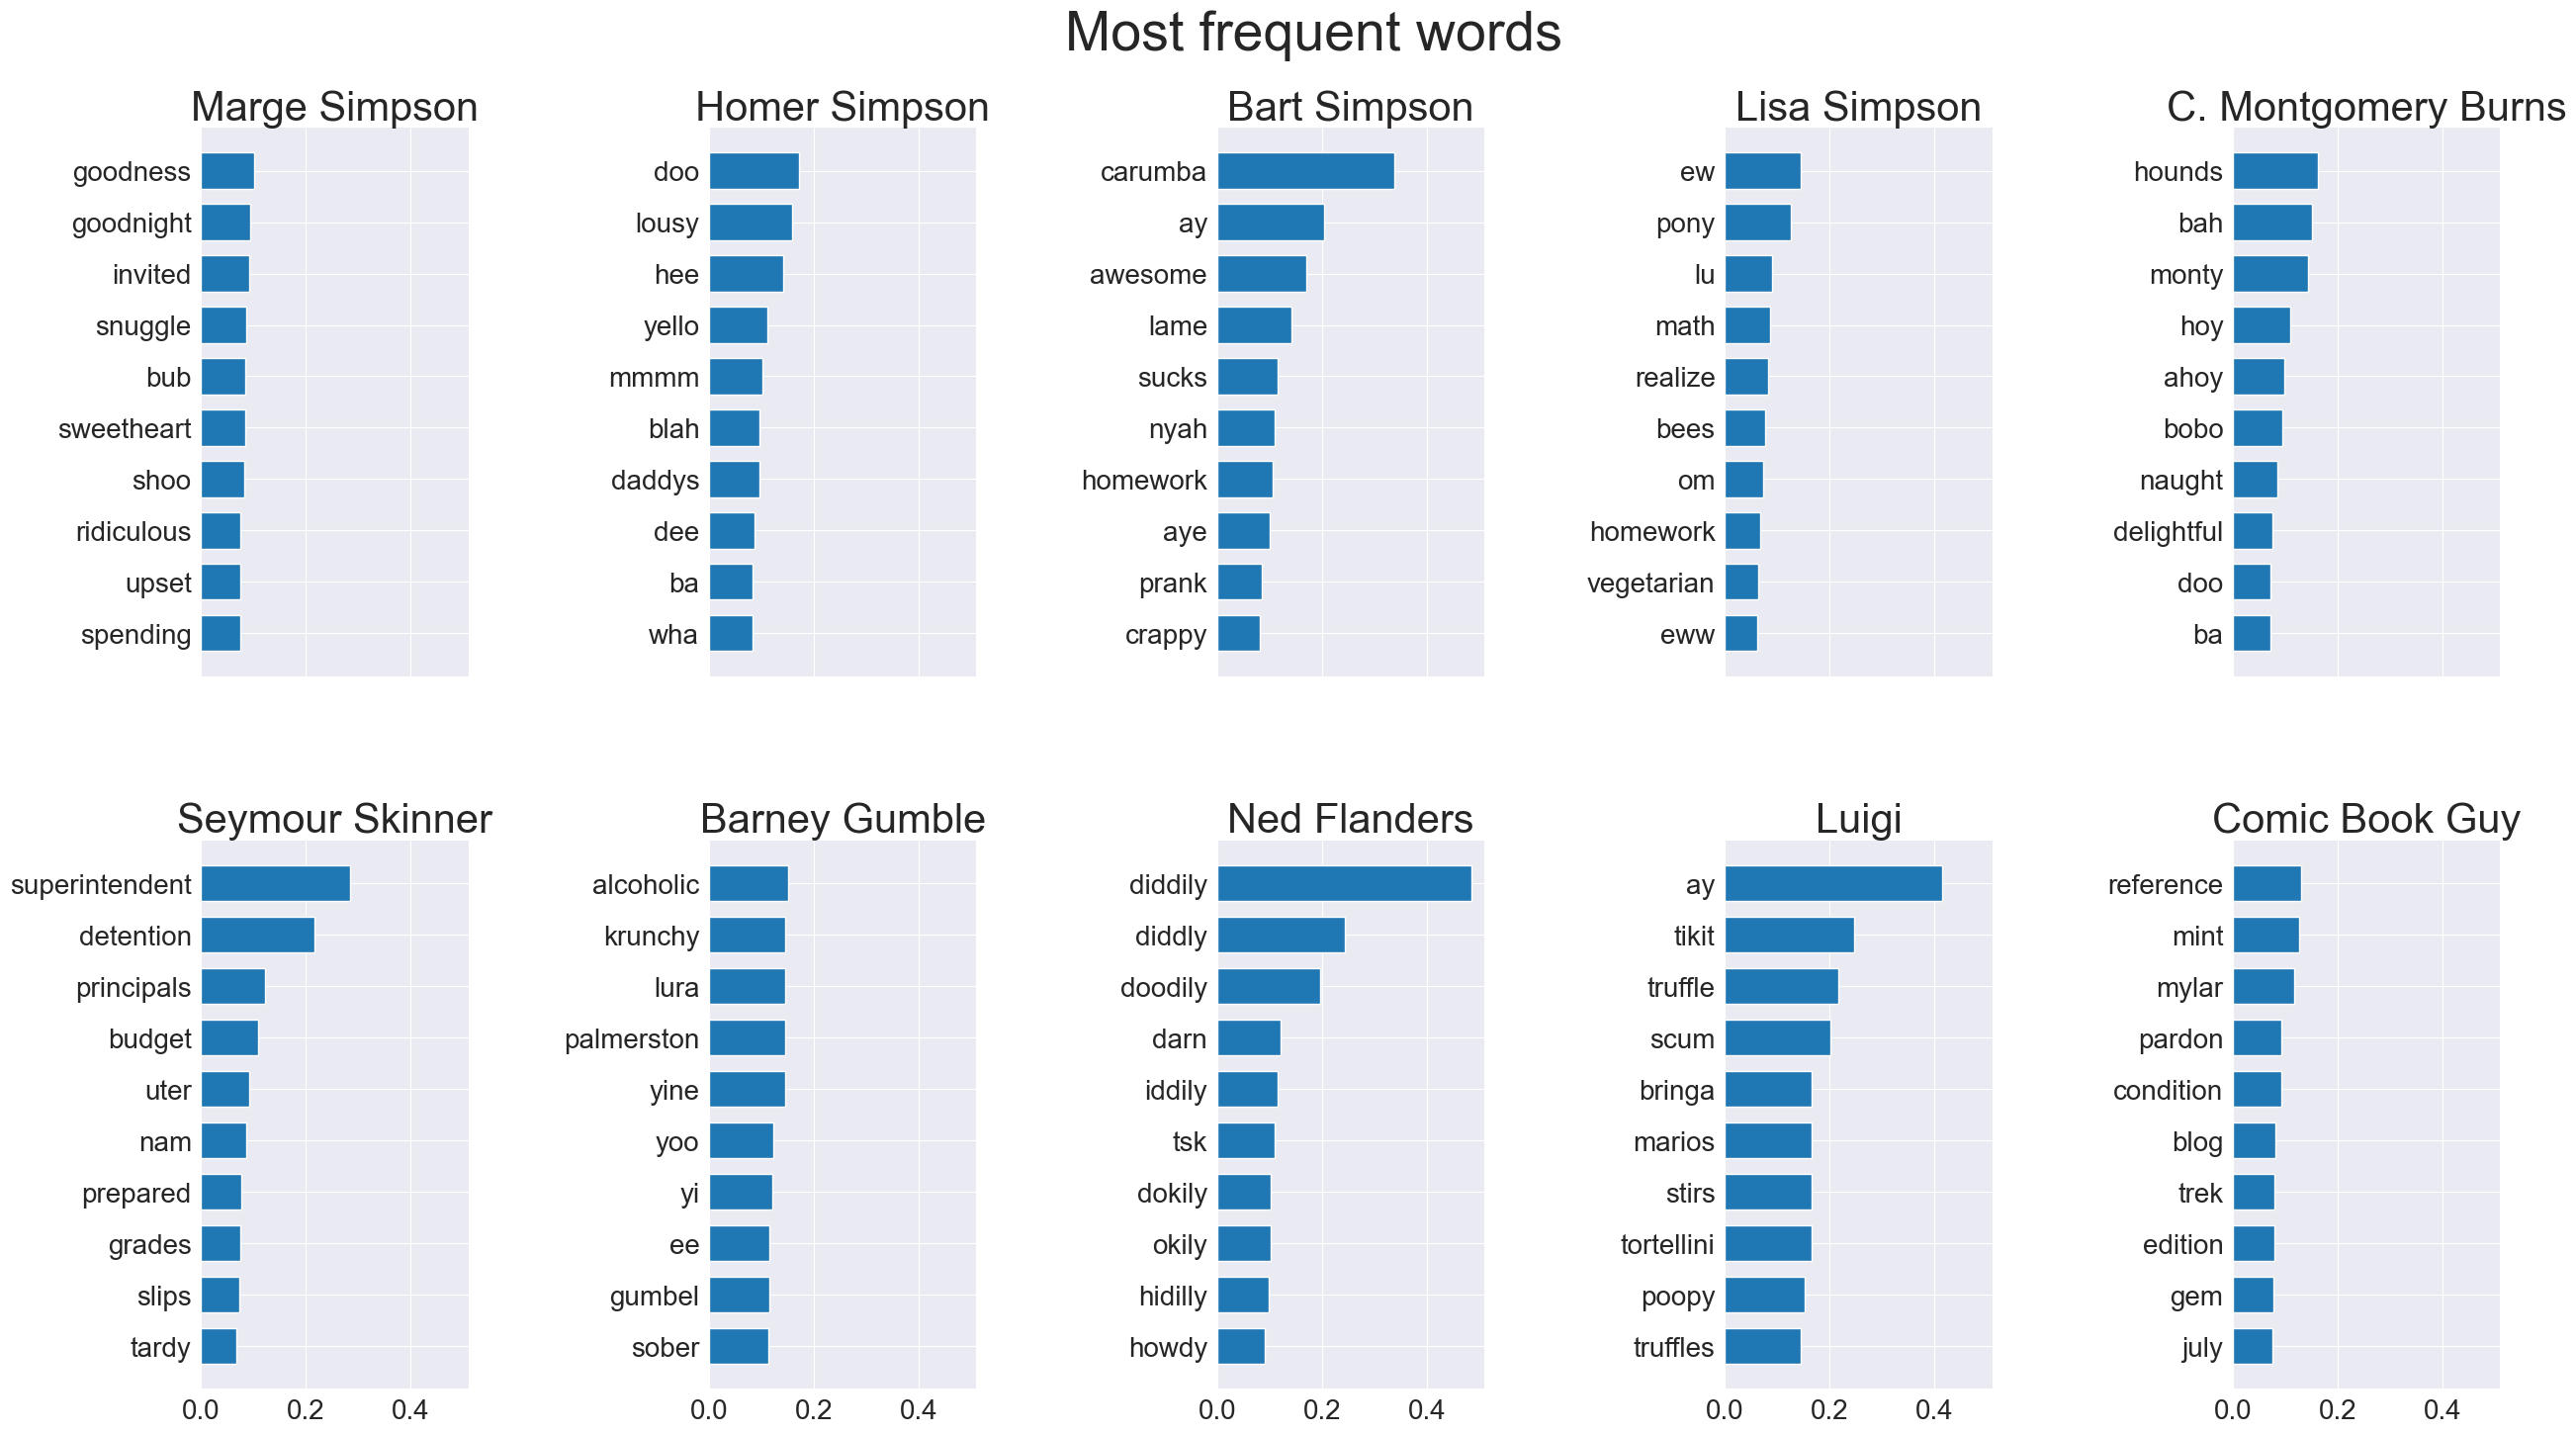

In [487]:
plot_top_words()

In [395]:
from collections import Counter

unique_words = []

# iterate over each document
for lines in character_lines:
    # split the document into words
    words = lines.split(' ')
    # create a Counter object to count the frequency of each word
    counter = Counter(words)
    # get the most common words in the document
    most_common = counter.most_common()

    # add the unique words to the list of unique words
    unique_words.append(set(word for word, count in most_common if count == most_common[0][1]))

# get the intersection of all sets of unique words
common_unique_words = set.intersection(*unique_words)

# print the common unique words
print(common_unique_words)

set()


In [396]:

def extract_top_k_keywords(character_id, k):
    #print(characters_df.loc[characters_df['id']==character_id]['name'])
    #text_list = script_df.loc[script_df['character_id']==character_id]['raw_text'].tolist()
    #text_list = [x for x in text_list if str(x) != 'nan']
    vectorizer = TfidfVectorizer(stop_words=stopwords_df['stopwords'].tolist(), lowercase=True, min_df=0.05, max_df=0.95)
    tf_idf_matrix = vectorizer.fit_transform(character_lines)
    feature_names = vectorizer.get_feature_names_out()

    # Get the average tf-idf score for each feature across all documents
    feature_scores = tf_idf_matrix.mean(axis=0).tolist()[0]

    # Create a dictionary mapping feature names to their tf-idf scores
    feature_dict = dict(zip(feature_names, feature_scores))

    # Sort the features by tf-idf score and return the top k features
    top_k_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:k]

    # Extract the feature names from the top k features and return them as a list
    top_k_keywords = [feature[0] for feature in top_k_features]

    return top_k_keywords

In [397]:
extract_top_k_keywords(2, 10)

['good', 'time', 'gonna']

0
1
2
3
4
5
6
7
8
9


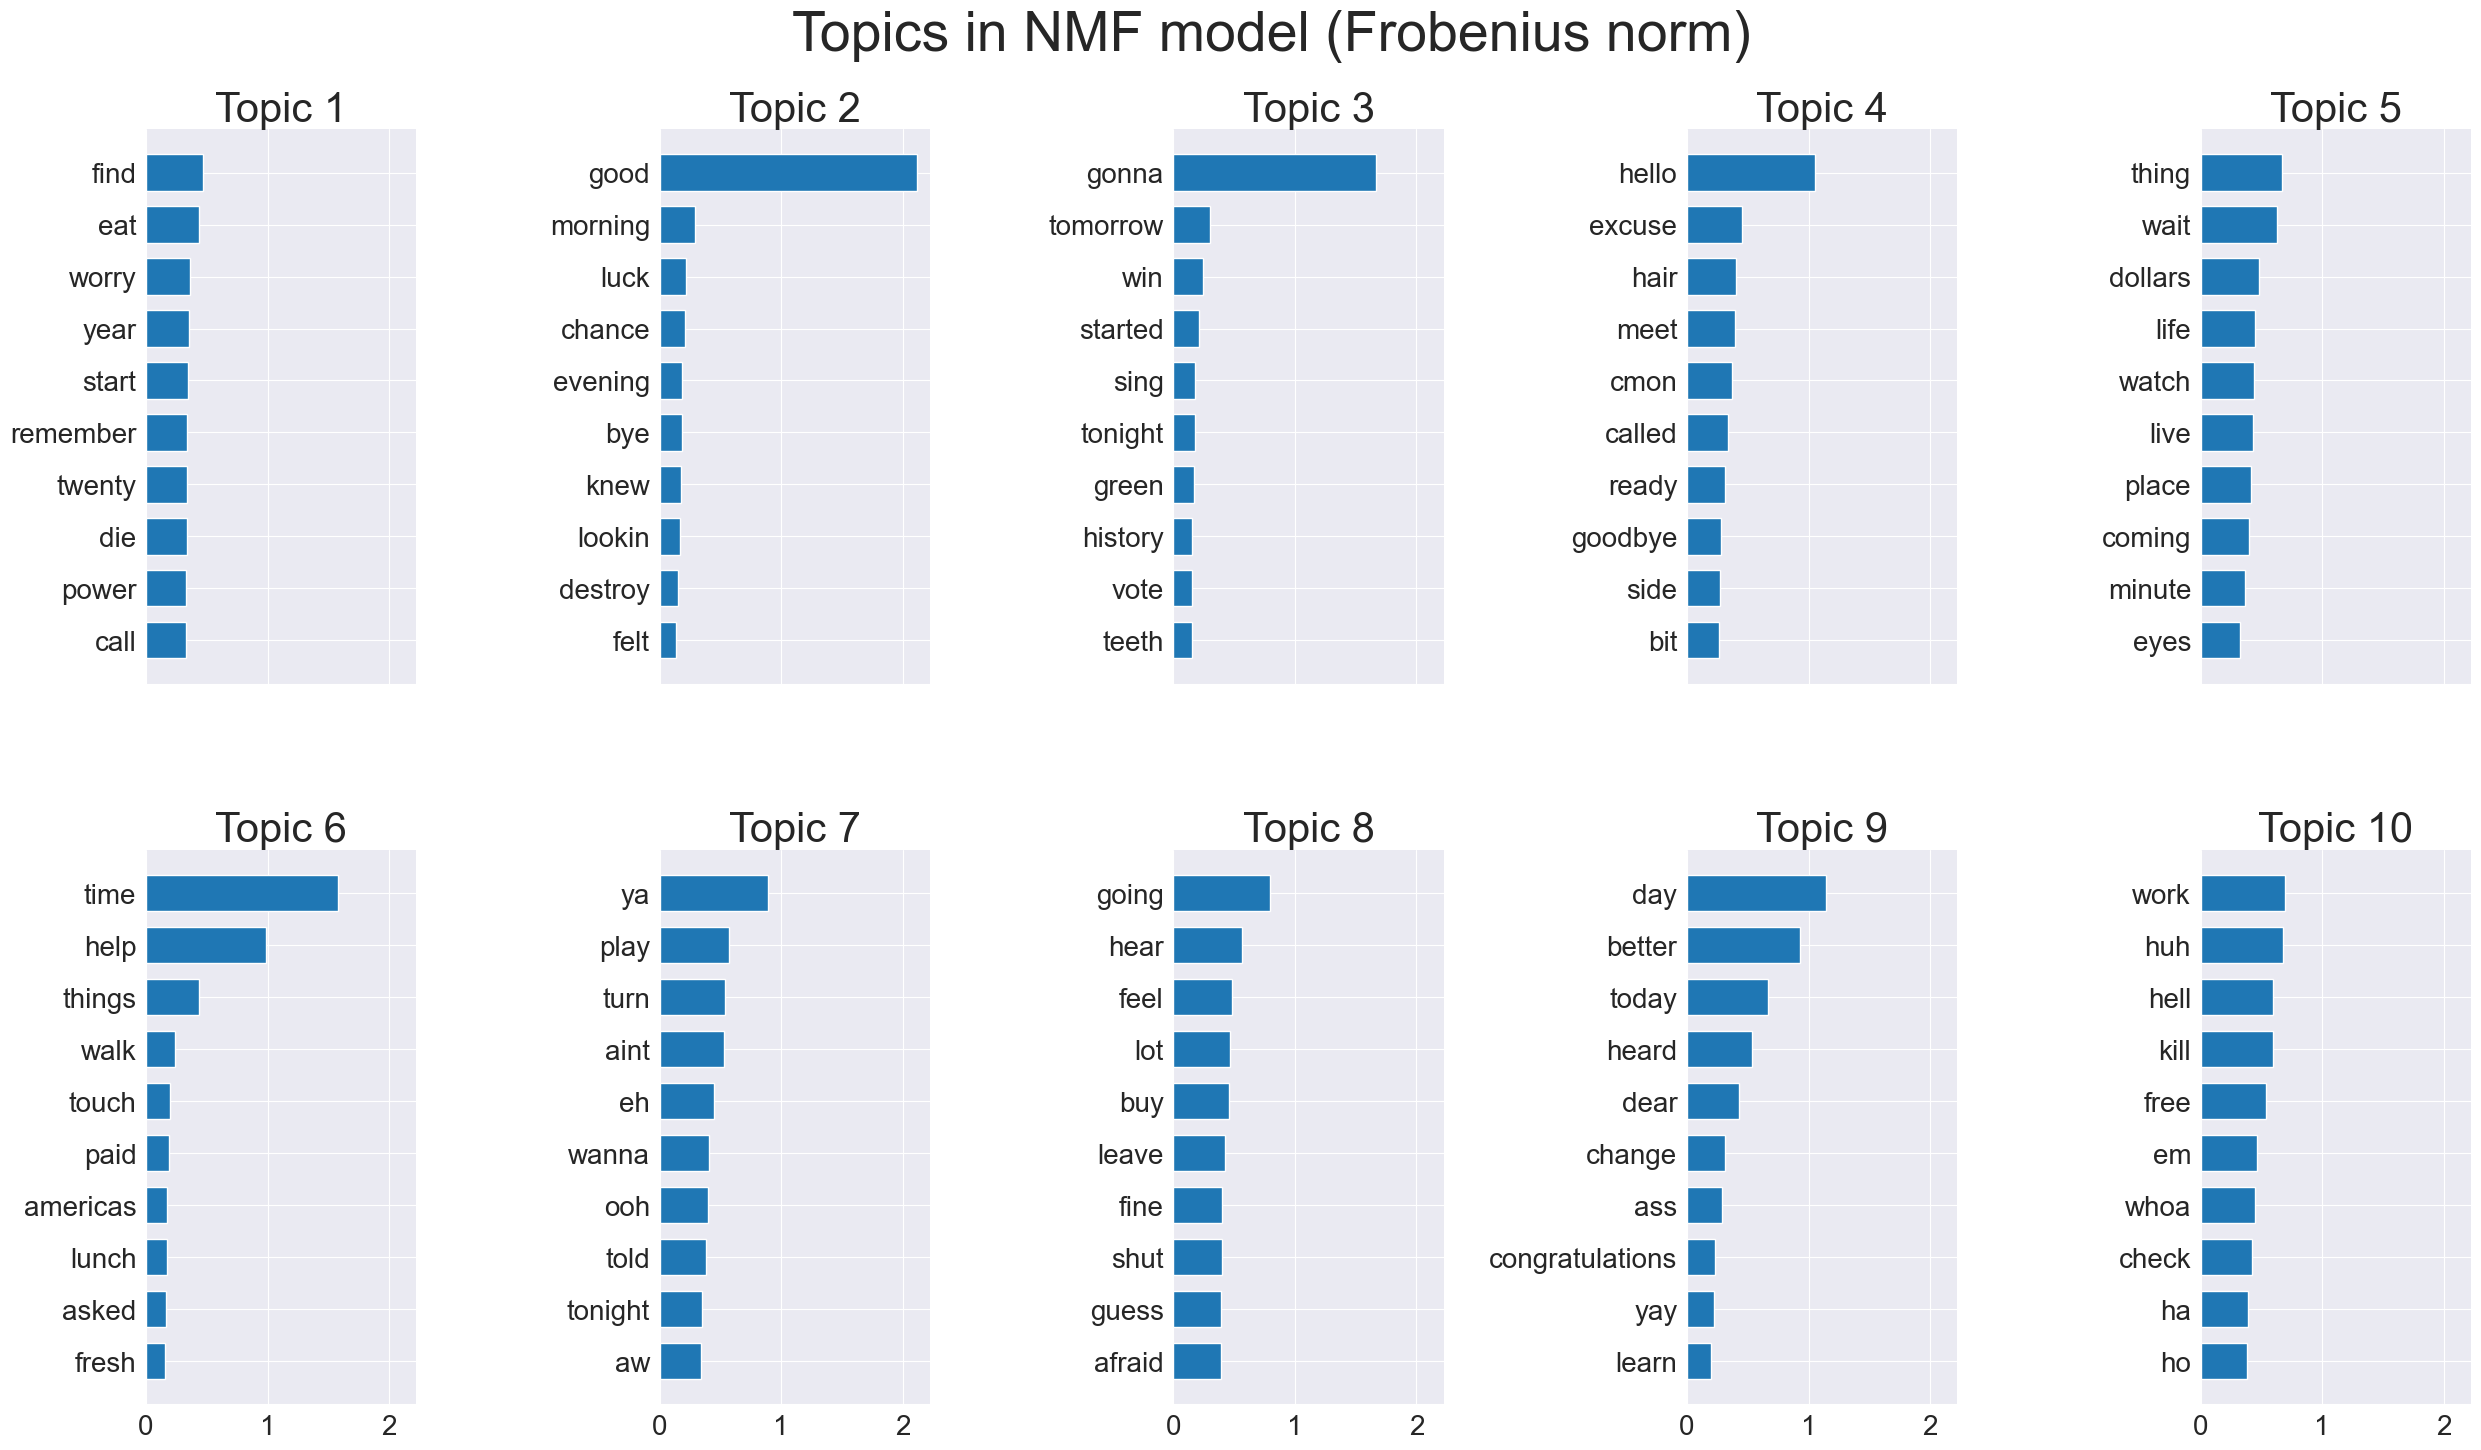

In [398]:
from sklearn.decomposition import NMF
from matplotlib import pyplot as plt


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        print(topic_idx)
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.3, max_features=1000, stop_words=stopwords_df['stopwords'].tolist()
)

tfidf = tfidf_vectorizer.fit_transform(character_lines)

nmf = NMF(
    n_components=10,
    random_state=1,
    init="nndsvda",
    beta_loss="kullback-leibler",
    solver="mu",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
    max_iter=1000
).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, 10, "Topics in NMF model (Frobenius norm)"
)